In [1]:
# ----------------------------------------------------------------------------
# Author        :    Vasileios Perifanis
# Affiliation   :    Euclid team, Democritus University of Thrace, Dept. of Electrical & Computer Engineering
# Created Date  :    03/2022
# version       :    1.0
# ---------------------------------------------------------------------------

In [2]:
import numpy as np # linear algebra
import pandas as pd # data analysis
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("datasets/houses_train.csv", header=0) # read csv
print(len(data))
data.head()

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
mis_val = data.isnull().sum()
mis_val = mis_val[mis_val > 0]
mis_val.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [5]:
# drop columns with multiple NaNs
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
             , axis = 1, inplace = True)

# replace other NaNs with mean
data.fillna(data.mean(), inplace=True)

In [6]:
# tranform to log
data["SalePrice"] = np.log1p(data["SalePrice"])

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


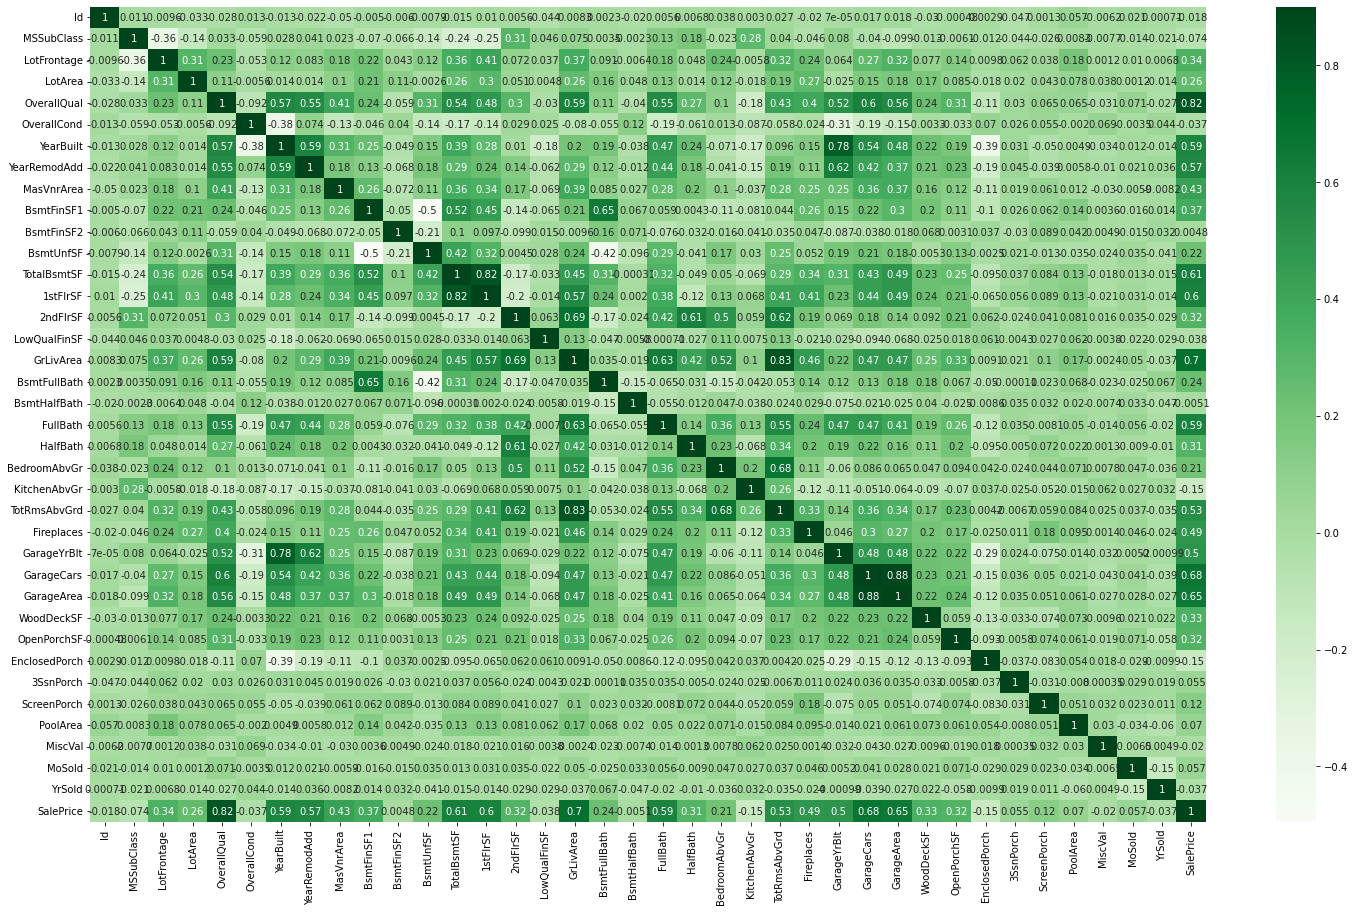

In [8]:
corr_matrix = data.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="Greens")

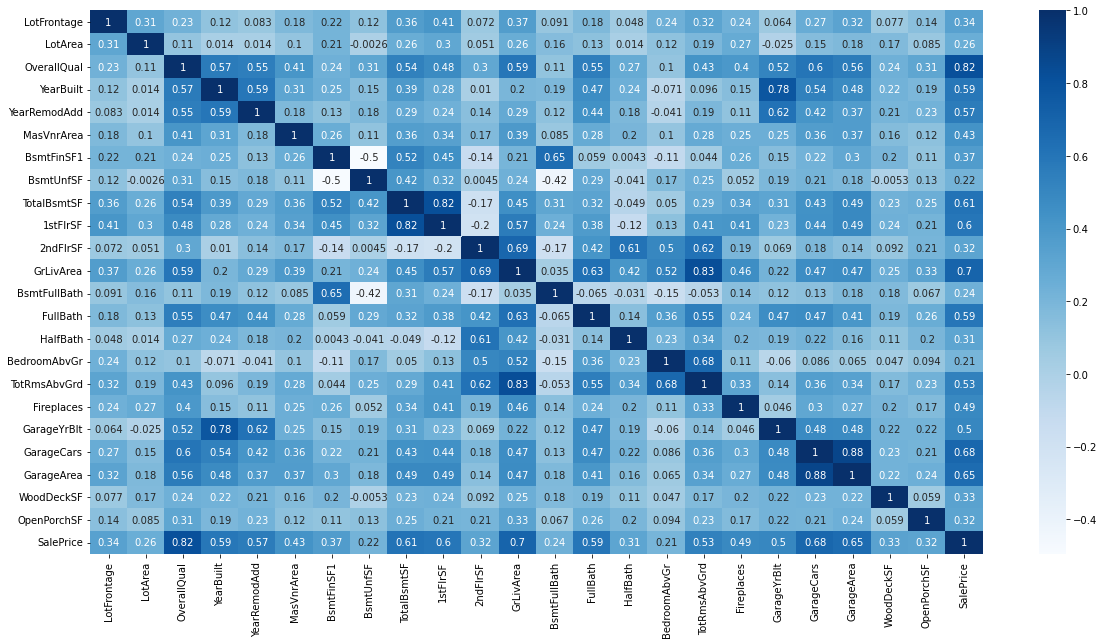

In [9]:
corr_matrix = data.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.2]
plt.figure(figsize=(20,10))

g = sns.heatmap(data[top_corr_features].corr(),
                annot=True,
                cmap="Blues")

In [10]:
corr_matrix_2 = pd.DataFrame(corr_matrix.iloc[-1,:]).T

throw_away_col = []
for col in corr_matrix_2:
    if abs(0 < corr_matrix_2[col][0]) <= 0.2:
        throw_away_col.append(col)
print(throw_away_col)


['Id', 'MSSubClass', 'OverallCond', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold']


In [11]:
# Remove features lower than 0.2
data.drop(['Id', 'MSSubClass', 'OverallCond', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold']
              , axis = 1, inplace = True)

In [12]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,0,61,0,0,0,2,WD,Normal,12.247699
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Y,298,0,0,0,0,5,WD,Normal,12.109016
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,0,42,0,0,0,9,WD,Normal,12.317171
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Y,0,35,0,0,0,2,WD,Abnorml,11.849405
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Y,192,84,0,0,0,12,WD,Normal,12.429220


In [13]:
numeric = data.select_dtypes(include=[np.number])
numeric_cols = list(numeric.columns)

In [14]:
for col in data.columns:
    if str(col) not in numeric_cols:
        print(col, data[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [15]:
# One hot Encoding
ohe_hot_data = pd.get_dummies(data)

In [16]:
ohe_hot_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,0,953,953,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790,163,589,1542,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275,0,877,1152,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,5,1950,1996,0.0,49,1029,0,1078,...,0,0,0,1,0,0,0,0,1,0


In [17]:
list(ohe_hot_data.columns)

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhoo

In [18]:
def split(data):
    train,test=train_test_split(data,test_size=0.3,random_state=0)
    return train, test

def to_numpy(train, test):
    train_X=train[train.columns[1:]].to_numpy()
    train_Y=train[train.columns[:1]].to_numpy().ravel()
    test_X=test[test.columns[1:]].to_numpy()
    test_Y=test[test.columns[:1]].to_numpy().ravel()
    return train_X, train_Y, test_X, test_Y

In [19]:
target = ohe_hot_data.pop('SalePrice')
ohe_hot_data.insert(0, 'SalePrice', target)

In [20]:
ohe_hot_data

,SalePrice,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.247699,65.0,8450,7,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,12.109016,80.0,9600,6,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,12.317171,68.0,11250,7,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,11.849405,60.0,9550,7,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,12.429220,84.0,14260,8,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,62.0,7917,6,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,12.254868,85.0,13175,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,12.493133,66.0,9042,7,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,11.864469,68.0,9717,5,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
train, test = split(ohe_hot_data)

In [22]:
train_X, train_Y, test_X, test_Y = to_numpy(train, test)

In [23]:
train_Y

array([12.29911207, 12.06105265, 11.66565514, ..., 11.62626308,
       12.36308067, 12.30592251])

In [24]:
# transform X
standard_scaler = preprocessing.StandardScaler().fit(train_X)
train_X = standard_scaler.transform(train_X)
test_X = standard_scaler.transform(test_X)

In [25]:
train_Y[0], test_Y[0]

(12.299112067295642, 12.209192772866418)

In [26]:
import math

In [27]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.8)
elastic.fit(train_X, train_Y)

y_pred_train = elastic.predict(train_X)
y_pred = elastic.predict(test_X)

In [28]:
mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 0.0122, RMSE: 0.1107, MAE: 0.0793, R^2: 0.9242
 [Testing set] MSE: 0.0347, RMSE: 0.1864, MAE: 0.0891, R^2: 0.7751


In [29]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_X, train_Y)

y_pred_train = rf.predict(train_X)
y_pred = rf.predict(test_X)

mse_train = mean_squared_error(train_Y, y_pred_train)
rmse_train = math.sqrt(mse_train)
mae_train = mean_absolute_error(train_Y, y_pred_train)
r2_train = r2_score(train_Y, y_pred_train)

mse = mean_squared_error(test_Y, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(f"[Training set] MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}\n",
      f"[Testing set] MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

[Training set] MSE: 0.0032, RMSE: 0.0565, MAE: 0.0381, R^2: 0.9802
 [Testing set] MSE: 0.0177, RMSE: 0.1331, MAE: 0.0925, R^2: 0.8853


In [30]:
y_pred[:10]

array([12.26148611, 11.81537475, 11.69650489, 12.31476013, 11.39783128,
       11.55324009, 12.47518775, 11.71104029, 13.00247981, 11.95871603])

In [31]:
test_Y[:10]

array([12.20919277, 11.79811193, 11.60824474, 12.16525586, 11.38510346,
       11.3504183 , 12.55293005, 11.85652226, 13.52114084, 11.91036512])

In [32]:
# inverse
y_pred = np.expm1(y_pred)
test_Y = np.expm1(test_Y)

In [33]:
y_pred[:10]

array([211394.51018165, 135315.90420212, 120150.03938074, 222961.78014436,
        89127.21944117, 104112.8294041 , 261760.15681044, 121909.23748778,
       443510.85445031, 156171.43592939])

In [34]:
test_Y[:10]

array([200624., 133000., 110000., 192000.,  88000.,  85000., 282922.,
       141000., 745000., 148800.])